In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bikedata=pd.read_csv('../input/used-bikes/Used_Bikes.csv')

In [3]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [4]:
bikedata.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [5]:
bikedata.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


So this data has the prices of used bikes of 23 different brands in different Indian cties. Some of the bikes have been used by as many as 4 owners. There are far too many cities given in the dataset to have any significant effect on the analysis, so, the 'city' column has been deleted.

In [6]:
del bikedata['city']

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

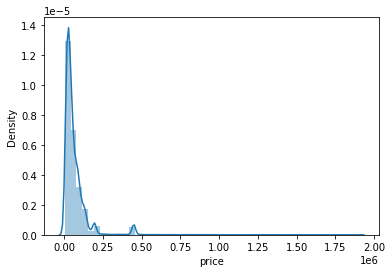

In [7]:
sns.distplot(bikedata['price'])

'price' has been taken as the dependent variable for the analysis. The distribution plot is positively skewed.

In [8]:
print('skewness = ',bikedata['price'].skew())
print('kurtosis = ',bikedata['price'].kurt())

skewness =  5.78019041593245
kurtosis =  55.51444868143317


The distribution of our target vaiable is positively skewed and is leptokurtic.

In [9]:
bikedata['new_price']=np.log(bikedata['price'])

To reduce the skewness of the distrbution curve, the 'price' variable has been transformed using log transformation.

In [10]:
bikedata['new_price']

0        10.463103
1        11.694413
2        13.304685
3        11.082143
4        11.289782
           ...    
32643    10.571317
32644    10.308953
32645    11.002100
32646     9.655026
32647     9.998798
Name: new_price, Length: 32648, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='new_price', ylabel='Density'>

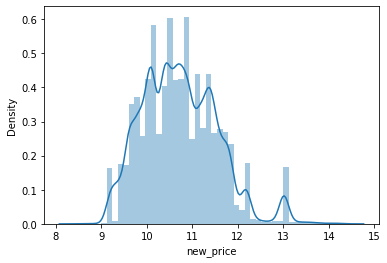

In [11]:
sns.distplot(bikedata['new_price'])

Now the distribution of the transformed target variable is much closer to normal distribution than the untransformed variable.

In [12]:
print('skewness = ',bikedata['new_price'].skew())
print('kurtosis = ',bikedata['new_price'].kurt())

skewness =  0.5481552442679232
kurtosis =  0.3532949142907329


In [13]:
indep=['kms_driven','owner','age','power','brand']
X=bikedata[indep]

In [14]:
Y=bikedata['new_price']

In [15]:
X

,kms_driven,owner,age,power,brand
0,17654.0,First Owner,3.0,110.0,TVS
1,11000.0,First Owner,4.0,350.0,Royal Enfield
2,110.0,First Owner,8.0,675.0,Triumph
3,16329.0,First Owner,4.0,180.0,TVS
4,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...
32643,22000.0,First Owner,4.0,100.0,Hero
32644,6639.0,First Owner,9.0,180.0,TVS
32645,20373.0,First Owner,6.0,220.0,Bajaj
32646,84186.0,First Owner,16.0,125.0,Hero


In [16]:
Y

0        10.463103
1        11.694413
2        13.304685
3        11.082143
4        11.289782
           ...    
32643    10.571317
32644    10.308953
32645    11.002100
32646     9.655026
32647     9.998798
Name: new_price, Length: 32648, dtype: float64

In [17]:
X=pd.get_dummies(data=X,columns=['owner'])

Two of our independent variables i.e; 'owner' and 'brand' are categorical. So, dummy variables are created for these variables.

In [18]:
X=pd.get_dummies(data=X,columns=['brand'])

In [19]:
X

,kms_driven,age,power,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,brand_Benelli,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,17654.0,3.0,110.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,11000.0,4.0,350.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,110.0,8.0,675.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16329.0,4.0,180.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,10000.0,3.0,150.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32643,22000.0,4.0,100.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32644,6639.0,9.0,180.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32645,20373.0,6.0,220.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
32646,84186.0,16.0,125.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=67)

In [22]:
regress=LinearRegression()

In [23]:
regress.fit(X_train,Y_train)

LinearRegression()

In [24]:
Y_pred=regress.predict(X_test)

In [25]:
print(r2_score(Y_pred,Y_test))

0.8842921051136352


In [26]:
print(cross_val_score(regress,X,Y,cv=10))

[0.76003471 0.80684401 0.80310756 0.92568901 0.92735646 0.9253678
 0.92570547 0.92534609 0.92806263 0.92597662]


In [27]:
scores = cross_val_score(regress,X,Y,cv=10)
avg_score=np.mean(scores)
print('avg_score = ',np.mean(scores))

avg_score =  0.8853490368258807


In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
print('sqrt_mse = ',np.sqrt(mean_squared_error(Y_test,Y_pred)))

sqrt_mse =  0.2647499808395631


In [30]:
Y_pred

array([10.86147694, 10.86147694, 10.98476943, ..., 10.60348095,
        9.34698313, 10.86147694])

In [31]:
Y_pred_1=np.exp(Y_pred)

In [32]:
Y_pred_1

array([52129.01263134, 52129.01263134, 58969.13363989, ...,
       40274.78824806, 11464.18525779, 52129.01263134])